### Import Modules

In [1]:
import pandas as pd
import numpy as np

### Load and Check Dataset

In [2]:
data = pd.read_csv('IMDB-database-update.csv', encoding = 'latin1')
data.head(3)

,movie_ID,movie_title,duration,color,title_year,country,language,content_rating,budget_USD,gross_USD,...,actor_3_facebook?,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook?,movie_facebook_likes;,facenumber_in_poster,num_voted_users,num_user_for_reviews,imdb_score,imdb_top_250
0,1,Avatar,178,1,2009,USA,English,PG-13,237000000,760505847,...,1,855,4834,1,33000,0,886204,3054,7.9,0
1,2,Pirates of the Caribbean: At World's End,169,1,2007,USA,English,PG-13,300000000,309404152,...,1,1000,48350,0,0,0,471220,1238,7.1,0
2,3,The Dark Knight Rises,164,1,2012,USA,English,PG-13,250000000,448130642,...,1,23000,106759,1,164000,0,1144337,2701,8.5,1


In [3]:
# Memilih Kolom Numerik
col_num = data.select_dtypes(include=np.number).columns
col_num

Index(['movie_ID', 'duration', 'color', 'title_year', 'budget_USD',
       'gross_USD', 'net_USD', 'profitable', 'director_facebook?',
       'director_facebook_likes', 'actor_top20?', 'actor_1_facebook?',
       'actor_1_facebook_likes', 'actor_top20?.1', 'actor_2_facebook?',
       'actor_2_facebook_likes', 'actor_top20?.2', 'actor_3_facebook?',
       'actor_3_facebook_likes', 'cast_total_facebook_likes',
       'movie_facebook?', 'movie_facebook_likes;', 'facenumber_in_poster',
       'num_voted_users', 'num_user_for_reviews', 'imdb_score',
       'imdb_top_250'],
      dtype='object')

In [4]:
# Memilih Kolom Kategorik
col_categ = data.select_dtypes(exclude=np.number).columns
col_categ

Index(['movie_title', 'country', 'language', 'content_rating', 'director_name',
       'director_top20?', 'actor_1_name', 'actor_2_name', 'actor_3_name'],
      dtype='object')

In [5]:
# Membuat Function Untuk Menghitung Jumlah Value yang ada pada tiap kolom
def countColumns(data, columns):
    for i in columns:
        print(data[i].value_counts())
        print("\n========================================")

In [6]:
# Menggunakan Untuk Menghitung Jumlah Value Pada Kolom Kategorik
countColumns(data, col_categ)

Home                          3
King Kong                     3
Victor Frankenstein           3
Halloween                     3
Pan                           3
                             ..
Mr 3000                       1
Boyz n the Hood               1
The Outsiders                 1
The Wild Thornberrys Movie    1
How to Be Single              1
Name: movie_title, Length: 3679, dtype: int64

USA               3009
UK                 318
France             101
Germany             80
Canada              60
Australia           39
Spain               22
Japan               15
China               14
Hong Kong           13
New Zealand         11
Denmark              9
Italy                9
Mexico               8
South Korea          7
Ireland              7
Brazil               5
India                5
Norway               4
Iran                 4
Thailand             4
Argentina            3
Netherlands          3
Czech Republic       3
South Africa         3
Russia               3
Isr

In [7]:
# Menggunakan Untuk Menghitung Jumlah Value Pada Kolom Numerik
countColumns(data, col_num)

2047    1
617     1
641     1
2688    1
637     1
       ..
3299    1
1250    1
3295    1
1246    1
2049    1
Name: movie_ID, Length: 3781, dtype: int64

101    116
100    107
98     102
95      96
99      95
      ... 
200      1
196      1
192      1
190      1
66       1
Name: duration, Length: 149, dtype: int64

1    3657
0     124
Name: color, dtype: int64

2002    191
2006    189
2005    183
2004    182
2009    181
       ... 
1957      1
1959      1
1961      1
1967      1
1936      1
Name: title_year, Length: 73, dtype: int64

20000000     162
30000000     134
15000000     131
40000000     129
25000000     126
            ... 
139000000      1
13400000       1
19400870       1
379000         1
806947         1
Name: budget_USD, Length: 362, dtype: int64

144512310    3
218051260    3
47000000     3
8000000      3
5773519      3
            ..
434949459    1
29302097     1
56876365     1
1277257      1
25600000     1
Name: gross_USD, Length: 3663, dtype: int64

 106512310    3
 

In [8]:
# Melihat nilai unik pada kolom 'title_year'
data['title_year'].unique()

array([2009, 2007, 2012, 2016, 2006, 2013, 2014, 2010, 2005, 1997, 2015,
       2011, 2008, 1995, 2004, 2003, 2001, 2002, 1998, 1990, 2000, 1999,
       1991, 1994, 1996, 1982, 1992, 1989, 1993, 1978, 1985, 1940, 1980,
       1984, 1973, 1983, 1987, 1988, 1970, 1977, 1981, 1986, 1975, 1968,
       1967, 1979, 1974, 1971, 1961, 1946, 1952, 1950, 1948, 1963, 1969,
       1976, 1964, 1927, 1965, 1972, 1953, 1939, 1947, 1936, 1937, 1960,
       1957, 1959, 1954, 1935, 1933, 1962, 1929], dtype=int64)

In [9]:
# Filter data tahun 2000 ke atas
df_2000 = data[data['title_year']>=2000]
df_2000 = df_2000['title_year'].value_counts()

In [10]:
import matplotlib
import matplotlib.pyplot as plt
# Import Library Seaborn
import seaborn as sns

# Menggunakan Style Visualisasi ggplot
plt.style.use("ggplot")

Text(0.5, 1.0, 'Movie Count by Year')

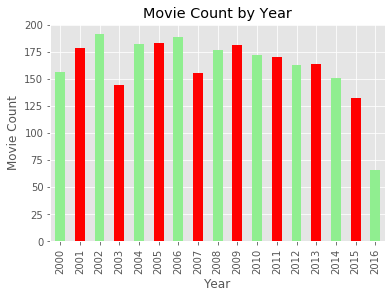

In [11]:
# Visualisasi jumlah film dari tahun 2000 ke atas
year = df_2000.sort_index().plot(kind='bar', color = ['lightgreen','red'])
year.set_xlabel('Year')
year.set_ylabel('Movie Count')
year.set_title("Movie Count by Year")

In [12]:
# Membuat filter data tahun 2015
data_2015=data[data['title_year']==2015]

In [13]:
# Menghitung jumlah value pada kolom 'content_rating'
data_2015['content_rating'].value_counts()

PG-13        57
R            51
PG           22
Not Rated     1
G             1
Name: content_rating, dtype: int64

Text(0.5, 1.0, 'Content Rating')

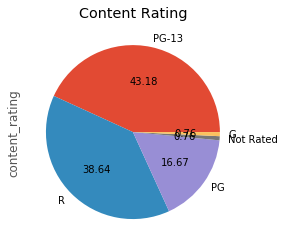

In [14]:
# Visualisasi pada kolom 'content_rating' dari tahun 2015
data_2015['content_rating'].value_counts().plot.pie(autopct='%.2f')
plt.title('Content Rating')

Text(0.5, 1.0, 'Color')

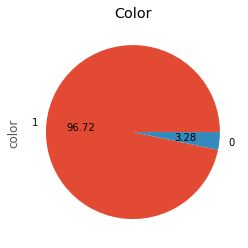

In [15]:
# Visualisasi pie chart dari data jumlah value pada kolom 'color'
data['color'].value_counts().plot.pie(autopct='%.2f')
plt.title('Color')

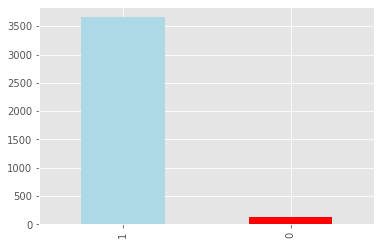

In [16]:
# Visualisasi bar chart dari data jumlah value pada kolom 'color'
data['color'].value_counts().plot(kind='bar', color = ['lightblue','red'])

***